# Biodiversity in National Parks

This project analyzes biodiversity data from the National Parks Service, with a focus around various species observed in different national park locations. 

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

The main questions this project will address are the following:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Focusing on birds, which is the species most prevalent and what is their distribution amongst parks?

**Data sources**

Both `observations.csv` and `species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Import modules
Libraries used throughout the project.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
#to hide warnings from plots:
import warnings
warnings.filterwarnings("ignore")

## Loading the data and preliminary considerations
The data are loaded into two dataframes `df_obs` and `df_spec` from **observations.csv** and **species_info.csv** respectively.

The two datasets provided are:
- **species_info.csv** - contains data about different species and their conservation status.
- **observations.csv** - holds recorded sightings of different species at several national parks for the past 7 days.

These are loaded in two `Pandas` `Dataframes`, `df_spec` and `df_obs` respectively.

In [2]:
df_obs = pd.read_csv('observations.csv')
df_spec = pd.read_csv('species_info.csv')

### Preliminary considerations on the observations data
This dataset contains 23296 entries. It contains 3 columns:
- `scientific_name`, the scientific name of the species observed.
- `park_name`, the National Park name where the observations took place.
- `observations`, the number of observations.

There are 5541 unique different species in the dataset and 4 different National Parks: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, Yellowstone National Park.

The dataset does not contain `NaN` values and the types for each entries are as expected (`object` for the first two columns, and `int` for the third one).

In [3]:
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
print('The length of df_obs is {}.'.format(len(df_obs)))
print('\n')
print('Count of null values in df_obs:')
print(df_obs.isnull().sum())
print('\n')
print('Check for type of values in df_obs:')
print(df_obs.dtypes)
print('\n')
print('Number of unique entries for scientific_name: {}.'.format(df_obs.scientific_name.nunique()))
print('\n')
print('Number of unique entries for park_name: {}.'.format(df_obs.park_name.nunique()))
print('The National Park in the dataset are: {}.'.format(df_obs.park_name.unique()))
print('\n')
print('The maximum and minimum number of observations are: {} and {}.'
      .format(df_obs.observations.max(),df_obs.observations.min()))

The length of df_obs is 23296.


Count of null values in df_obs:
scientific_name    0
park_name          0
observations       0
dtype: int64


Check for type of values in df_obs:
scientific_name    object
park_name          object
observations        int64
dtype: object


Number of unique entries for scientific_name: 5541.


Number of unique entries for park_name: 4.
The National Park in the dataset are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park'].


The maximum and minimum number of observations are: 321 and 9.


### Preliminary considerations on the species information data
This dataset contains 5824 entries. It contains 4 columns:
- `category`, the animal category.
- `scientific_name`, the scientific name of the species.
- `common_names`, the common name of the species.
- `conservation_status`, the conservation status of the species.

There are 5541 unique different species, as for the observation dataset, and 5504 unique common names. The species are divided into 7 unique different categories:
- 214 species are `Mammal`
- 521 species are `Bird`
- 79 species are `Reptile`
- 80 species are `Amphibian`
- 127 species are `Fish`
- 4470 species are `Vascular Plant`
- 333 species are `Nonvascular Plant`

Plants are the most frequent species in the dataset, with 4470 vascular plants adn 333 nonvascular plants. The rest of the dataset is composed by animals, the most frequent category is bird, with 521 species.

The last column, `conservation_status`, contains 5633 `NaN` values, the 96.7% of the entries. In this context, a `NaN` value corresponds to a non-endangered species, and it is no matter of concern. For a smoother analysis, this value will be changed in `Non-endangered`. The other possible status are: Species of Concern, Endangered, Threatened, In Recovery.

The type for all entries is as expected `object`.

In [5]:
df_spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
print('The length of df_spec is {}.'.format(len(df_spec)))
print('\n')
print('Count of null values in df_spec:')
print(df_spec.isnull().sum())
print('\n')
print('Check for type of values in df_spec:')
print(df_spec.dtypes)
print('\n')
print('Number of unique entries for category: {}.'.format(df_spec.category.nunique()))
print('The category in the dataset are: {}.'.format(df_spec.category.unique()))
print('\n')
print('Number of unique entries for scientific_name: {}.'.format(df_spec.scientific_name.nunique()))
print('\n')
print('Number of unique entries for common_name: {}.'.format(df_spec.common_names.nunique()))
print('\n')
print('The different status of conservation are: {}.'.format(df_spec.conservation_status.unique()))

The length of df_spec is 5824.


Count of null values in df_spec:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


Check for type of values in df_spec:
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


Number of unique entries for category: 7.
The category in the dataset are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant'].


Number of unique entries for scientific_name: 5541.


Number of unique entries for common_name: 5504.


The different status of conservation are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery'].


In [7]:
df_spec['category'].value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [8]:
df_spec.conservation_status.fillna(value='Non-endangered', inplace=True)
df_spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Non-endangered
1,Mammal,Bos bison,"American Bison, Bison",Non-endangered
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Non-endangered
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Non-endangered
4,Mammal,Cervus elaphus,Wapiti Or Elk,Non-endangered


## Analysis
This section explores the data more in depth. 

The first task is to focus on the conservation status of the different species. As seen in the preliminary exploration, the majority of species needs no intervention. Specifically, 5633 out of 5824 different species considered, the 96.7%, are considered non-endangered. The status of the remaining species is:
- 161 `Species of Concern`, declining or appear to be in need of conservation.
- 10 `Threatened`, vulnerable to endangerment in the near future.
- 16 `Endangered`, seriously at risk of extinction.
- 4 `In Recovery`, formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range.

In [9]:
df_spec.conservation_status.value_counts()

conservation_status
Non-endangered        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

Bird is the category most present between the species that need intervention, making up the 41.3% of all species that need intervention, followed by vascular plants with 24.1% and mammals with 19.9%.

In [10]:
conservation_category = df_spec[df_spec['conservation_status'] != 'Non-endangered']\
    .groupby(['conservation_status','category'])['scientific_name'].count().unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [11]:
conservation_category.sum()

category
Amphibian             7.0
Bird                 79.0
Fish                 11.0
Mammal               38.0
Nonvascular Plant     5.0
Reptile               5.0
Vascular Plant       46.0
dtype: float64

In [12]:
palette = sns.color_palette('colorblind')

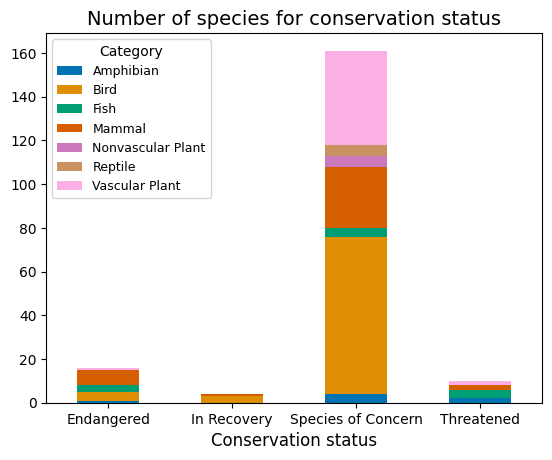

In [13]:
ax = conservation_category.plot(kind='bar',stacked=True,rot=0,color=palette)
plt.title('Number of species for conservation status',fontsize=14)
plt.xlabel('Conservation status',fontsize=12)
plt.legend(title='Category',fontsize=9)
plt.show()

### Categories in conservation

The next step is to consider how likely is a species to be endangered given its category. To do so, we create a new column `Protected`, to differentiate between species that need intervention and those who don't. We then group by `category` and `Protected` to show the break down of each species type and protection status.

In [14]:
df_spec['Protected'] = df_spec.conservation_status != 'Non-endangered'

In [15]:
category_counts = df_spec.groupby(['Protected','category'])['scientific_name'].nunique().reset_index()\
        .pivot(columns='Protected', index='category',values='scientific_name').reset_index()
category_counts.columns = ['category', 'Not protected', 'Protected']
category_counts

,category,Not protected,Protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Finally, we calculate the rate of protection that each category exhibits in the data. This analysis shows that the categories with the higher percentage in protection are mammals, with 17.0%, and birds, with 15.4%.

In [16]:
category_counts['Percentage protected'] = category_counts.Protected / \
                        (category_counts.Protected + category_counts['Not protected']) * 100

category_counts

,category,Not protected,Protected,Percentage protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Statistical significance

This section focuses in understanding if different species have statistically significant differences in conservation status rates. We will run chi-square tests of homogeneity, using contingency tables.

The first case considers mammals and birds categories. The chi-square test returns a p-value of 0.69,  in this case the two categories can be thought of coming from the same populations, and there is no significant differences in conservation status rates.

In [17]:
from scipy.stats import chi2_contingency

contingency_Bird_Mammal = category_counts[(category_counts.category == 'Mammal')\
                           |(category_counts.category == 'Bird')]\
                        [['Protected','Not protected']].values.tolist()
chi2_contingency(contingency_Bird_Mammal)

Chi2ContingencyResult(statistic=0.16170148316545574, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 77.1686747, 410.8313253],
       [ 27.8313253, 148.1686747]]))

Next we consider amphibians and birds categories. The chi-square test returns a p-value of 0.18, in this case the two categories can be thought of coming from the same populations, and there is no significant differences in conservation status rates.

In [18]:
contingency_Bird_Amph = category_counts[(category_counts.category == 'Amphibian')\
                           |(category_counts.category == 'Bird')]\
                        [['Protected','Not protected']].values.tolist()
chi2_contingency(contingency_Bird_Amph)

Chi2ContingencyResult(statistic=1.831621580618698, pvalue=0.17593613249594683, dof=1, expected_freq=array([[ 11.42504409,  67.57495591],
       [ 70.57495591, 417.42504409]]))

The following two cases considers birds and vascular/non-vascular plants categories. The chi-square test returns a p-value of 1 10^-10 and 4 10^-79, for bird-non vascular and bird-vascular respectively. In both cases, the two categories can be thought of coming from the different populations, and there is significant difference in conservation status rates.

In [19]:
contingency_Bird_NonVasc = category_counts[(category_counts.category == 'Nonvascular Plant')\
                           |(category_counts.category == 'Bird')]\
                        [['Protected','Not protected']].values.tolist()
chi2_contingency(contingency_Bird_NonVasc)

Chi2ContingencyResult(statistic=41.717457869992714, pvalue=1.0546306904975004e-10, dof=1, expected_freq=array([[ 47.55176614, 440.44823386],
       [ 32.44823386, 300.55176614]]))

In [20]:
contingency_Bird_Vasc = category_counts[(category_counts.category == 'Vascular Plant')\
                           |(category_counts.category == 'Bird')]\
                        [['Protected','Not protected']].values.tolist()
chi2_contingency(contingency_Bird_Vasc)

Chi2ContingencyResult(statistic=354.42332680820607, pvalue=4.612268031690143e-79, dof=1, expected_freq=array([[  12.43115789,  475.56884211],
       [ 108.56884211, 4153.43115789]]))

We now show two example with mammals populations, first compared with amphibian and then with reptiles. In the first case, the chi-square test gives a p-value of 0.13, and there is no statistical significance in conservation rates. In the second case, however, the p-value is 0.04, and it seems that there is statistical difference in conservation rates.

In [21]:
contingency_Mammal_Amph = category_counts[(category_counts.category == 'Mammal')\
                           |(category_counts.category == 'Amphibian')]\
                        [['Protected','Not protected']].values.tolist()
chi2_contingency(contingency_Mammal_Amph)

Chi2ContingencyResult(statistic=2.321746712946015, pvalue=0.12757669693198975, dof=1, expected_freq=array([[ 11.4627451,  67.5372549],
       [ 25.5372549, 150.4627451]]))

In [22]:
contingency_Mammal_Rept = category_counts[(category_counts.category == 'Mammal')\
                           |(category_counts.category == 'Reptile')]\
                        [['Protected','Not protected']].values.tolist()
chi2_contingency(contingency_Mammal_Rept)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

### Species information

The analysis now focus on data from recording of sightings of different species at several national parks for the past 7 days. We will focus on the `Bird` category.

The first step is to look at the the common names from species to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [23]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = df_spec[df_spec.category == "Bird"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

The next step is to clean up duplicate words in each row, to avoid counting them more than once per species. Then the words need to be collapsed into one list for easier use.

In [24]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

In [25]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Brewsters', 'Warbler', 'Coopers', 'Hawk', 'Northern', 'Goshawk']

Now the data is ready to be able to count the number of occurrences of each word. The analysis shows that the most frequent species is `warbler`, which appeared 59 times.

In [26]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
367,Warbler,59
336,Sparrow,29
295,American,21
284,Northern,20
270,Owl,18
115,Flycatcher,18
260,Common,18
390,Western,12
195,Woodpecker,12
311,Sandpiper,11


In the data, there are several different scientific names for different types of warblers. The next task is to figure out which rows of species are referring to warblers. A new column made up of boolean values will be created to check if is_warb is True.

In [27]:
df_spec['is_warb'] = df_spec.common_names.str.contains(r"\bWarbler\b", regex = True)

df_spec.head(10)

,category,scientific_name,common_names,conservation_status,Protected,is_warb
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Non-endangered,False,False
1,Mammal,Bos bison,"American Bison, Bison",Non-endangered,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Non-endangered,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Non-endangered,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Non-endangered,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Non-endangered,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Non-endangered,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where is_warb is true, returning see the rows that matched. There seems to be a lot of species of warblers, prevalently non-protected.

In [28]:
df_spec[df_spec.is_warb]

,category,scientific_name,common_names,conservation_status,Protected,is_warb
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Non-endangered,False,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,Non-endangered,False,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,Non-endangered,False,True
249,Bird,Dendroica cerulea,Cerulean Warbler,Non-endangered,False,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,Non-endangered,False,True
251,Bird,Dendroica discolor,Prairie Warbler,Non-endangered,False,True
252,Bird,Dendroica dominica,Yellow-Throated Warbler,Non-endangered,False,True
253,Bird,Dendroica fusca,Blackburnian Warbler,Non-endangered,False,True
254,Bird,Dendroica magnolia,Magnolia Warbler,Non-endangered,False,True
255,Bird,Dendroica palmarum,Palm Warbler,Non-endangered,False,True


Next the results of the warbler species will be merged with observations to create a DataFrame with observations of warblerss across the four national parks.

In [29]:
warb_observations = df_obs.merge(df_spec[df_spec.is_warb])
warb_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,Protected,is_warb
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,Non-endangered,False,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,Non-endangered,False,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,Non-endangered,False,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,Non-endangered,False,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,Non-endangered,False,True
...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,Non-endangered,False,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,Non-endangered,False,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,Non-endangered,False,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,Non-endangered,False,True


The total number of warblerss observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 14487 observations and the Great Smoky Mountains National Park having the lowest with 4435.

In [30]:
warb_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


Now let's see each park broken down by protected warbler vs. non-protected warbler sightings. Every park has more sightings of non-protected warblers. This is expected, since we saw earlier that the majority of warblers are not in conservation. This is also shown in the plot below.

In [31]:
obs_by_park = warb_observations.groupby(['park_name', 'Protected']).observations.sum().reset_index()
obs_by_park

,park_name,Protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


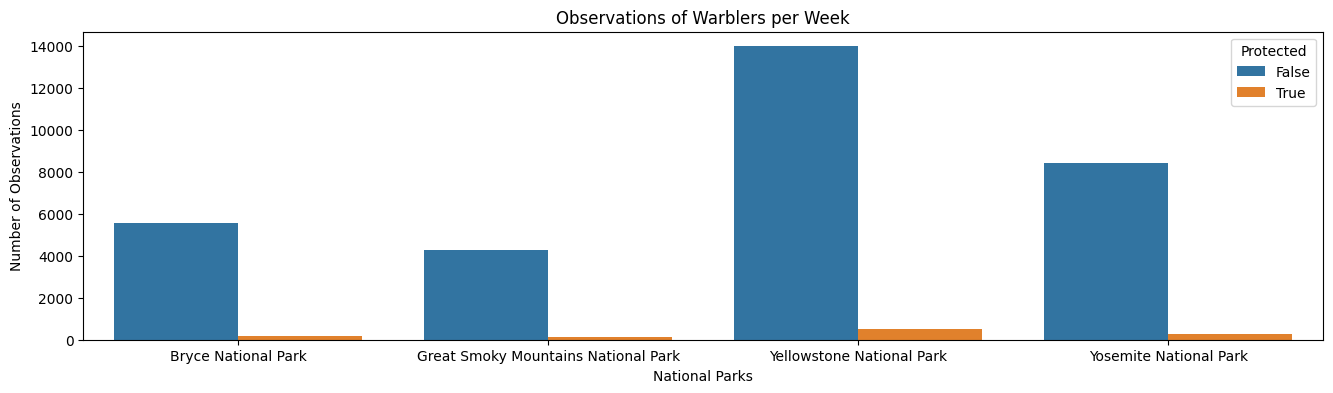

In [32]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.Protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warblers per Week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this dataset.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - This varies widely between different categories. For example, mammals and birds do not have significant difference in conservation percentage, but birds and plants (both vascular and non-vascular) present a stron statistical difference in conservation percentage.
- Which bird is most prevalent and what is their distribution amongst parks?
    - the study found that warblers occurred the most number of times, and they were most likely to be found in Yellowstone National Park.